## Autoencoders

![](graphs/ae.png)



https://arxiv.org/pdf/2003.05991
https://arxiv.org/pdf/2007.02500.pdf

### Key concept
* The main promise of the autoencoders is to learn an encoding structure and a decoding structure for a given set of data
* can do everything that a PCA model does and more ( pure linear autoencoder would give the same results with PCA)
* better deal with nonlinearites than PCA

### Variants
- Undercomplete Autoencoders: In this type, the hidden dimension is smaller than the input dimension. Training such autoencoder lead to capturing the most prominent features. However, using an overparameterized architecture in case of a lack of sufficient training data create overfitting and bars learning valuable features. A linear decoder can operate as PCA. However, the existence of non-linear functions create a more powerful dimensionality reduction model.
- Regularized Autoencoders: Instead of limiting the dimension of an autoencoder and the hidden layer size for feature learning, a loss function will be added to prevent overfitting.
- Sparse Autoencoders: Sparse autoencoders allow for representing the information bottleneck without demanding a decrease in the size of the hidden layer. Instead, it operates based on a loss function that penalizes the activations inside a layer.
- Denoising Autoencoders (DAE): We want an autoencoder to be sufficiently sensitive to regenerate the original input but not strictly sensitive so the model can learn a generalizable encoding and decoding. The approach is to insignificantly corrupt the input data with some noise with an uncorrupted data as the target output..
- Contractive Autoencoders (CAE): In this type of autoencoders, for small input variations, the encoded features should also be very similar. Denoising autoencoders force the reconstruction function to resist minor changes of the input, while contractive autoencoders enforce the encoder to resist against the input perturbation.
- Variational Autoencoders: A variational autoencoder (VAE) presents a probabilistic fashion for explaining an observation in hidden space. Therefore, instead of creating an encoder which results in a value to represent each latent feature, the encoder produces a probability distribution for each hidden feature.

### Applications
Autoencoders are mainly used for:
- dimensionality reduction 
- noise reduction
- generative tasks

### Key issues
* require a lot of data and computing power compared to a PCA model
* autoencoders focus on extracting all the information instead of extracting the relevant information

### Autoencoder architecture
![](graphs/ae_arch.png)


### Vanilla Autoencoder
![](graphs/ae_vanilla.png)



In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


<img src="img/1.png">

In [4]:
input_img=Input(shape=(X_train.shape[1]))

encoded=Dense(128, activation='relu')(input_img)
encoded=Dense(64, activation='relu')(encoded)
encoded=Dense(32, activation='relu')(encoded)


decoded=Dense(64, activation='relu')(encoded)
decoded=Dense(128, activation='relu')(decoded)
decoded=Dense(784, activation='sigmoid')(decoded)

autoencoder=Model(input_img, decoded)

In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

In [6]:
encoder=Model(input_img, encoded)

In [7]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [8]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [9]:
autoencoder.fit(X_train,X_train,
               epochs=50,
               batch_size=256, validation_data=(X_test,X_test) )


Epoch 1/50
235/235 [==============================] - 6s 12ms/step - loss: 0.2496 - val_loss: 0.1689
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1515 - val_loss: 0.1375
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1325 - val_loss: 0.1254
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1228 - val_loss: 0.1183
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1175 - val_loss: 0.1140
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1138 - val_loss: 0.1108
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1107 - val_loss: 0.1082
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1081 - val_loss: 0.1061
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1060 - val_loss: 0.1039
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1041 - val_lo

In [15]:
encoded_img=encoder.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [16]:
encoded_img

array([[1.9823714 , 2.993502  , 1.3200727 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.6319385 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.068116  , 0.6011245 , ..., 1.2886939 , 0.        ,
        0.19896486],
       ...,
       [0.        , 5.060758  , 2.0863016 , ..., 0.32534808, 0.        ,
        0.        ],
       [0.        , 2.8231878 , 1.6091003 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.4120457 , 0.907556  , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [17]:
encoded_img.shape

(10000, 32)

In [18]:
predicted=autoencoder.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [19]:
predicted

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

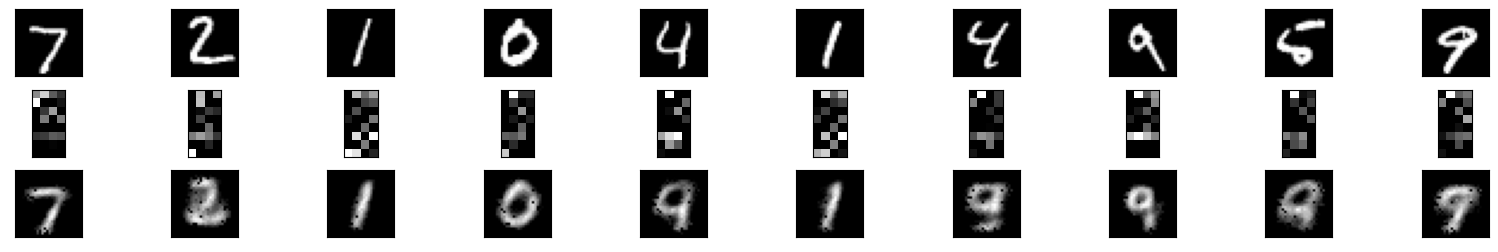

In [26]:
# %load "g:/My Drive/mnist.py"
# plotting the noised image, encoded image and the reconstructed image
plt.figure(figsize=(40, 4))
for i in range(10):
# display original images
    
    ax = plt.subplot(4, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# display encoded images
    
    ax = plt.subplot(4, 20, i + 1+20)
    plt.imshow(encoded_img[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    
# display predicted images
    ax = plt.subplot(4, 20, i + 1+2*20)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()
